# IMPORTANT

In [3]:
# The notebook should be named as ADS_HW5_<net_id>
# 10 pts will be deducted if the naming convention is not followed

# Task 1 (5 pts) 


a) Provide a definition for the concept of a conjugate prior given the Bayesian learning model

b) True or False:
Selecting a Gaussian prior for a likelihood function that is Gaussian, will ensure that the posterior distribution is also Gaussian

### Answer: 
a):
In Bayesian probability theory, if the posterior distributions p(θ|x) are in the same family as the prior probability distribution p(θ), the prior and posterior are then called conjugate distributions, and the prior is called a conjugate prior for the likelihood function.       


b) True                      
The Gaussian family is conjugate to itself (or self-conjugate) with respect to a Gaussian likelihood function: if the likelihood function is Gaussian, choosing a Gaussian prior over the mean will ensure that the posterior distribution is also Gaussian. This means that the Gaussian distribution is a conjugate prior for the likelihood that is also Gaussian.

# Task 2 (5 pts). 


1) In the Bayesian linear regression framework (True or False)  
    a) Using a Laplacian prior will lead to the Ridge Regression  
    b) Using a Laplacian prior will lead to Lasso Regression

2) (True or False)  
    a) Ridge can often help with feature selection  
    b) Lasso can often help with feature selection

### Answer: 
1):      
a)  False       
b)  True

2):    
a) False         
b) True

### Explanation: 
Ridge Regression shrinks the size the regression coefficients. In linear regression,if there are two correlated features, there coefficients can be poorly determined and have high variance. One of them can have a very large positive coefficient,and the other correlated feature can have a very large negative coefficient. They cancel each other. By adding the ridge penalty, the problem is alleviated, as it shrinks the coefficients towards 0. In the extreme case of k identical features,they each get small identical coefficients. So ridge penalty encourages features to borrow strength from each other. From a Bayesian point of view, the ridge regression estimation assumes that wj has a Gaussian distribution with 0 mean as its prior distribution. And the solution to ridge regression is the mean (or mode) of the posterior distribution.   
Lasso behaves differently than Ridge. If there are several correlated features,Lasso tends to pick one and ignore the rest. That is, some features will have coefficients exactly 0. So Lasso can be used to perform continuous feature selection. From a Bayesian point of view, the Lasso penalty corresponds to a Laplace prior

# Task 3 (10 pts). 
Answer some questions about the properties of Lasso/Ridge:

1.a) Which regression adds penalty equivalent to square of the magnitude of coefficients?  
1.b) Which regression adds penalty  equivalent to absolute value of the magnitude of coefficients?

2) Which of the Lasso and Ridge regressions possess an analytic solution in the closed form?

3) Which of the Lasso and Ridge regression is often use to completely eliminate coefficients for some of the regressors?

4) Which value of $\lambda$ makes Lasso and Ridge identical to the ordinary least square regression?

5) What dataset (training, validation or test) you would use to estimate the $\lambda$ for Lasso or Ridge?

# Extra Credit(50 pts to be applied towards this or any other homework)
For a regression where the variables are highly correlated, which would you use, Lasso or Ridge and why?

## Task 3 Answer: 
1a). Ridge   
1b). Lasso             
2). Ridge regression      
Its closed form is β^=inverse(X^T*X+λI)*X^T*Y by imposing a penalty on the regression coefficients, β∈Rp          
3). Lasso regression          
4). when $\lambda$ = 0, Lasso and Ridge identical to the ordinary least square regression.     
5). Validation because cross validation is adopted


## Extra Credit Answer:   
#### I would choose Ridge Regression.
Suppose there are two highly correlated predictor variables x,z, and suppose both are centered and scaled (to mean zero, variance one). Then the ridge penalty on the parameter vector is β21^2+β22^2 while the lasso penalty term is ∣β1∣+∣β2∣. Now, since the model is supposed highly colinear, so that x and z more or less can substitute each other in predicting Y, so many linear combination of x,z where we simply substitite in part x for z, will work very similarly as predictors, for example 0.2x+0.8x,0.3x+0.7z or 0.5x+0.5z will be about equally good as predictors. Now look at these three examples, the lasso penalty in all three cases are equal, it is 1, while the ridge penalty differ, it is respectively 0.68, 0.58, 0.5, so the ridge penalty will prefer equal weighting of colinear variables while lasso penalty will not be able to choose. This is one reason ridge will work better with colinear predictors: When the data give little reason to choose between different linear combinations of colinear predictors, lasso will just "wander" while ridge tends to choose equal weighting. 


# Task 4 (15 pts). 
Consider a Bayesian univariate linear regression $y\sim {\cal N}(wx,\sigma^2)$ with a given $\sigma=2$ and the prior $w\sim {\cal N}(4,2)$. Compute the posterior distribution after an observation $y=14,x=4$. After all, what is the probability of having $w<4$?

$$
\sim {\cal N}\left(\frac{ \sigma^{-2} \sum_i y_i x_i +(\sigma^*)^{-2} w^*}{\left(\sum_i x_i^2\sigma^{-2}+(\sigma^*)^{-2}\right)},
\frac{1}{\sqrt{(\sigma^*)^{-2}+\sum_i x_i^2\sigma^{-2}}}\right)
$$

In [36]:
import numpy as np
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
#import Quandl
import statsmodels.formula.api as smf
from scipy import stats
from sklearn import linear_model
from scipy.stats import norm

Populating the interactive namespace from numpy and matplotlib


In [37]:
def bayes_update(x, y, sigma, w_, sigma_):
    x, y = np.array(x), np.array(y)
    denom = (x**2).sum() / sigma**2 + 1. / sigma_**2
    return (x.dot(y) / sigma**2 + w_ / sigma_**2) / denom, 1. / np.sqrt(denom)

mu, sigma = bayes_update(x=[4], y=[14], sigma=2, w_=4, sigma_=2)
print('Updated: w~N({}, {})'.format(mu, sigma))
print('p(w>4)={}'.format(norm.cdf(4, mu, sigma)))

Updated: w~N(3.52941176471, 0.485071250073)
p(w>4)=0.834012266459


# Task 5 (20 pts)
For the training and test sets provided below, train a linear regression of $y$ (last column) vs the rest of the columns of the table treated as regressors (intercept excluded) over the training set, apply it to the test set and report it's R2 performance over both - training and test set.

In [11]:
## Learn to use numpy - Will be more useful in future
import pandas as pd
import numpy as np

data_train=pd.read_csv("HW_train.csv")
data_test=pd.read_csv("HW_test.csv")

# Remove unwanted column
data_train.drop('Unnamed: 0',axis=1, inplace=True)
data_test.drop('Unnamed: 0',axis=1, inplace=True)

In [12]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,96.789835,83.183133,24.177181,31.279398,-49.029524,18.872176,168.942794,94.488018,177.780409,27.695043,...,41.924134,65.876185,35.898562,34.726463,60.166744,22.004965,43.487052,60.069264,63.794491,65.691782
1,38.829317,35.843956,6.297793,15.523440,-21.995928,5.945662,72.037611,42.709207,75.362195,10.284752,...,73.765030,47.088544,43.625197,1.265374,53.481250,61.989699,22.419371,72.934372,8.783550,48.600203
2,29.925224,25.328958,0.102627,10.403224,-16.379497,4.272577,54.941945,33.758282,58.327999,5.344682,...,17.970740,28.483208,43.124356,75.088879,16.991777,3.603125,70.197916,45.761354,16.291789,11.967305
3,33.424303,27.676937,4.533496,12.010908,-18.159244,4.777495,54.333856,31.886517,61.607712,6.907591,...,97.752102,0.751484,20.599931,95.431639,30.861203,22.548684,93.988541,12.820426,47.022745,15.988018
4,69.816320,61.489566,17.181358,24.093144,-35.745184,13.386441,122.288929,68.878098,128.452555,18.808763,...,70.996612,86.602438,98.127347,5.357836,87.865145,40.298166,86.488322,60.963969,84.368874,53.736157


In [13]:
data_train = data_train.add_prefix('x')
data_test = data_test.add_prefix('x')
data_train.rename(columns = {'x40':'y'},inplace = True)
data_test.rename(columns = {'x40':'y'},inplace = True)

In [14]:
def modelEval(lm, key = 'y'):
    lmy = lm.predict(data_test)
    y_err = lmy - data_test[key]
    y_norm = data_test[key]-np.mean(data_test[key])
    return 1-y_err.dot(y_err)/y_norm.dot(y_norm)  

In [15]:
result = smf.ols(formula = 'y ~ '+ '+'.join(data_train.columns[:-1]), data = data_train).fit()
print('In sample R-squared: %f'%result.rsquared)
print('Out of sample R-squared: %f'%modelEval(result))

In sample R-squared: 1.000000
Out of sample R-squared: -1.028031


# Task 6 (20 pts)
Train Lasso and Ridge regressions using the training sample above with $\lambda_{Ridge}=3000$ and $\lambda_{Lasso}=30$ and report their performance over the test set.

In [18]:
y_train = data_train['y']

In [19]:
X_train = data_train.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]]
X_train.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39
0,96.789835,83.183133,24.177181,31.279398,-49.029524,18.872176,168.942794,94.488018,177.780409,27.695043,...,75.825672,41.924134,65.876185,35.898562,34.726463,60.166744,22.004965,43.487052,60.069264,63.794491
1,38.829317,35.843956,6.297793,15.523440,-21.995928,5.945662,72.037611,42.709207,75.362195,10.284752,...,53.341089,73.765030,47.088544,43.625197,1.265374,53.481250,61.989699,22.419371,72.934372,8.783550
2,29.925224,25.328958,0.102627,10.403224,-16.379497,4.272577,54.941945,33.758282,58.327999,5.344682,...,51.839900,17.970740,28.483208,43.124356,75.088879,16.991777,3.603125,70.197916,45.761354,16.291789
3,33.424303,27.676937,4.533496,12.010908,-18.159244,4.777495,54.333856,31.886517,61.607712,6.907591,...,63.825686,97.752102,0.751484,20.599931,95.431639,30.861203,22.548684,93.988541,12.820426,47.022745
4,69.816320,61.489566,17.181358,24.093144,-35.745184,13.386441,122.288929,68.878098,128.452555,18.808763,...,15.286711,70.996612,86.602438,98.127347,5.357836,87.865145,40.298166,86.488322,60.963969,84.368874


In [21]:
y_test = data_test['y']

In [22]:
X_test = data_test.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]]
X_test.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39
0,24.614936,22.521951,2.197478,9.819148,-17.840580,4.038417,45.040223,27.920974,48.337288,5.541484,...,76.387005,85.107110,28.738932,39.532761,28.256818,85.133257,71.739674,82.660726,26.841269,42.092646
1,45.453889,38.598541,6.868511,15.599206,-24.764269,7.090872,78.266837,42.097695,81.749616,12.269276,...,78.155191,92.923858,65.545650,5.055256,4.123023,45.566800,39.565349,22.327959,27.841619,7.512355
2,91.053932,82.169235,20.268322,28.880727,-46.329589,18.357093,157.059847,89.339661,166.453834,24.663196,...,42.146973,26.759732,46.254672,21.134454,7.632506,60.352286,1.957518,82.143760,54.083782,51.693172
3,-0.328703,0.123033,-8.139047,0.984829,-2.246921,-1.955727,0.862675,3.789570,1.050826,-1.210761,...,77.392123,16.139239,89.502163,67.420489,76.343227,57.400444,16.750873,6.927084,67.371692,79.108816
4,46.831963,40.137370,7.027021,15.288582,-25.713243,9.302304,81.402224,49.019587,86.408130,13.022716,...,88.055712,64.629393,97.141129,84.851024,45.952819,14.248448,82.044409,35.384527,43.914904,20.892924


In [23]:
lambda_ridge = 3000

In [24]:
Ridge = linear_model.Ridge(fit_intercept=True,alpha=lambda_ridge)

In [25]:
Ridge.fit(X_train,y_train)

Ridge(alpha=3000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [26]:
p_IS=Ridge.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Ridge is: {0}".format(R_2_IS_Ridge))

The R-squared we found for IS Ridge is: 0.919670798394


In [27]:
p_OS=Ridge.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Ridge is: {0}".format(R_2_OS_Ridge))

The R-squared we found for OS Ridge is: 0.521078167083


In [28]:
Lasso=linear_model.Lasso(fit_intercept=True,alpha=30) #try Ridge with a selected regularization parameter lambda

Lasso.fit(X_train,y_train)
# In the sample:
p_IS=Lasso.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Lasso is: {0}".format(R_2_IS_Ridge))

Lasso_coef=Lasso.coef_
#Out of sample
p_OS=Lasso.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Lasso is: {0}".format(R_2_OS_Lasso))

The R-squared we found for IS Lasso is: 0.919670798394
The R-squared we found for OS Lasso is: 0.648004682015


# Task 7 (25 pts)
a) For each $m=0,1,2,...39$ train OLS, Lasso and Ridge regressions(keep intercept) using the data from Task 5 above with $\lambda_{Ridge}=3000$ and $\lambda_{Lasso}=30$ using the first $m$ columns of the data tables as the regressors  
i.e train the models by adding in a new variable each time. eg. Y~ x0, Y~x0+x1, Y~x0+x1+x2...Y~x0+x1+...+x39  

b) Plot the in-sample (training) and out-of-sample (test) R2 for all three models on the same graph.  
i.e (x-axis is number of regressors, y will be your R^2 for InSample & OutSample for each of the 3 models, all in one graph)


In [29]:
Number_variables=range(len(data_train.columns[:-1]))
OLS_R_2_OS_F=[]
OLS_R_2_IS_F=[]

for i in Number_variables:
    
    lm1 = smf.ols(formula = 'y ~ '+ '+'.join(data_train.columns[:i+1]), data = data_train).fit()
    R2 = modelEval(lm1)
    OLS_R_2_IS_F.append(lm1.rsquared)
    OLS_R_2_OS_F.append(R2 if R2 > 0 else 0)
    

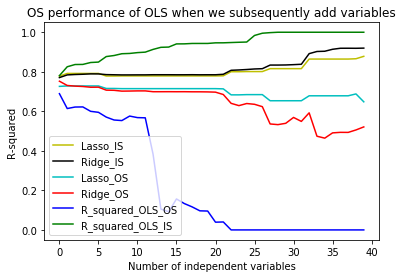

In [32]:
OLS_R_2_OS_F=[]
OLS_R_2_IS_F=[]
OLS_R_2_Ridge_OS_F=[]
OLS_R_2_Ridge_IS_F=[]
OLS_R_2_Lasso_OS_F=[]
OLS_R_2_Lasso_IS_F=[]

Ridge=linear_model.Ridge(fit_intercept=True,alpha=3000)
Lasso=linear_model.Lasso(fit_intercept=True, alpha=30)

for j in Number_variables:
    # OLS
    lm = smf.ols(formula = 'y ~ '+ '+'.join(data_train.columns[:j+1]), 
                 data = pd.concat([X_train.ix[:,:j+1],y_train], axis = 1)).fit()
    error = lm.predict(X_test.ix[:,:j+1]) - y_test
    R_2_OS_OLS=1-error.var()/y_test.var()
    R_2_IS_OLS = lm.rsquared
    OLS_R_2_IS_F.append(R_2_IS_OLS)
    OLS_R_2_OS_F.append(max(R_2_OS_OLS,0))
    
    # Ridge
    Ridge.fit(X_train.ix[:,:j+1],y_train)
    
    # In sample:
    err_IS=Ridge.predict(X_train.ix[:,:j+1]) - y_train
    R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
    OLS_R_2_Ridge_IS_F.append(R_2_IS_Ridge)
    
    #Out of sample
    err_OS=Ridge.predict(X_test.ix[:,:j+1]) - y_test
    R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
    OLS_R_2_Ridge_OS_F.append(max(R_2_OS_Ridge,0))

    # Lasso
    
    Lasso.fit(X_train.ix[:,0:j+1],y_train)
    
    #In sample:
    p_IS=Lasso.predict(X_train.ix[:,0:j+1])
    err_IS=p_IS-y_train
    R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
    OLS_R_2_Lasso_IS_F.append(R_2_IS_Lasso)

    #Out of sample
    p_OS=Lasso.predict(X_test.ix[:,0:j+1])
    err_OS=p_OS-y_test
    R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
    OLS_R_2_Lasso_OS_F.append(max(R_2_OS_Lasso,0))

plt.title('OS performance of OLS when we subsequently add variables')

plt.plot(Number_variables,OLS_R_2_Lasso_IS_F,'y',label='Lasso_IS')
plt.plot(Number_variables,OLS_R_2_Ridge_IS_F,'k',label='Ridge_IS')

plt.plot(Number_variables,OLS_R_2_Lasso_OS_F,'c',label='Lasso_OS')
plt.plot(Number_variables,OLS_R_2_Ridge_OS_F,'r',label='Ridge_OS')

plt.plot(Number_variables,OLS_R_2_OS_F,'b',label='R_squared_OLS_OS')
plt.plot(Number_variables,OLS_R_2_IS_F,'g',label='R_squared_OLS_IS')
plt.legend(loc='lower left')
plt.xlabel('Number of independent variables')
plt.ylabel('R-squared')
plt.show()


# Extracredit (100 pts of credit to be applied towards this or any other homework)
Using a series of 10 random splits (cross-validation) of the training sample into approximately 70% training and 30% validation samples perform the selection of the optimal $\lambda$ for Ridge and Lasso regression:   

a) For each $\lambda$ of an assumed sequence of $\lambda$'s(take a random range) compute validation R2 for all the 10 splits and finally select the $\lambda$ having the highest value for validation R2 for each split.  

b) Visualize the dependence of the validation R2 over $\lambda$s for Lasso and Ridge(x-axis = $\lambda$s from sequence, y-axis = corresponding R^2, graph for each split)

c) Report the R2 computed over the test set for the Lasso and Ridge trained over the entire training set with the selected optimal values of $\lambda$ out of the 10 splits.

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
#Find the Alpha and report best test performance for Ridge/Lasso.
def Regularization_fit_lambda(model,X_train,y_train,lambdas,p=0.3,Graph=False, logl=False):
    #model = 1-Ridge, 2-Lasso
    #lambdas: a list of lambda values to try
    #p: ratio of the validation sample size / total training size
    #Graph: plot the graph of R^2 values for different lambda

    R_2_OS=[]
    X_train0, X_valid, y_train0, y_valid = train_test_split(X_train,
                                    y_train, test_size = 0.3, random_state = 10)

    if model==1:
        RM = lambda a: linear_model.Ridge(fit_intercept=True, alpha=a)
        model_label='Ridge'
    else:
        RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a)
        model_label='Lasso'
    
    best_R2 = -1
    best_lambda = lambdas[0]
    
    for i in lambdas:
        lm = RM(i)
        lm.fit(X_train0,y_train0)  #fit the regularization model
        y_predict=lm.predict(X_valid) #compute the prediction for the validation sample 
        err_OS=y_predict-y_valid
        R_2_OS_=1-np.var(err_OS)/np.var(y_valid)
        R_2_OS.append(R_2_OS_)
        if R_2_OS_ > best_R2:
            best_R2 = R_2_OS_
            best_lambda = i
    
    if Graph==True:
        plt.title('IS R-squared vs OS-R-squared for different Lambda')
        if logl:
            plt.xlabel('ln(Lambda)')
            l=log(lambdas)
            bl=log(best_lambda)
        else:
            plt.xlabel('Lambda')
            l=lambdas
            bl=best_lambda
        plt.plot(l,R_2_OS,'b',label=model_label)
        plt.legend(loc='upper right')
        plt.ylabel('R-squared')
        plt.axvline(bl,color='r',linestyle='--')

        plt.show()
    
    return best_lambda

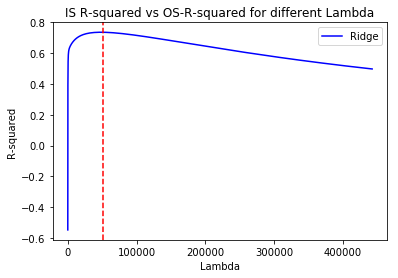

Optimal lambda for Ridge=50470.5728029


In [43]:
#select best lambda for Ridge
lambdas = np.exp(np.linspace(-5,13,200))
lambda_r_optimal=Regularization_fit_lambda(1,X_train,y_train,lambdas,p=0.3,Graph=True)
print('Optimal lambda for Ridge={0}'.format(lambda_r_optimal))

In [44]:
Ridge = linear_model.Ridge(fit_intercept=True,alpha=lambda_r_optimal) #try Ridge with a selected regularization parameter lambda

Ridge.fit(X_train,y_train)
# In the sample:
p_IS=Ridge.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Ridge is: {0}".format(R_2_IS_Ridge))

Ridge_coef=Ridge.coef_
#Out of sample
p_OS=Ridge.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Ridge is: {0}".format(R_2_OS_Ridge))

The R-squared we found for IS Ridge is: 0.84264212406
The R-squared we found for OS Ridge is: 0.706882091426


In [45]:
Ridge_coef

array([ 0.02994937,  0.02857191,  0.01133036,  0.01034191, -0.01631712,
        0.00578788,  0.05156899,  0.02698699,  0.05420664,  0.00940552,
       -0.02225466,  0.01174395, -0.04646725, -0.00284865, -0.01077209,
        0.02718464, -0.00146968, -0.0127477 , -0.05270336,  0.00982352,
        0.04197865,  0.00861966,  0.0228513 ,  0.00764719,  0.01758913,
        0.00420167, -0.00373518, -0.03687922,  0.00444633,  0.00199003,
        0.00183961,  0.00288574,  0.05317575, -0.01676443, -0.00181018,
        0.0051679 , -0.00462011, -0.01527674,  0.01634125, -0.03467562])

In [46]:
Lasso=linear_model.Lasso(fit_intercept=True,alpha=1)
#try Ridge with a selected regularization parameter lambda

Lasso.fit(X_train,y_train)
# In the sample:
p_IS=Lasso.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Lasso is: {0}".format(R_2_IS_Ridge))

Lasso_coef=Lasso.coef_
#Out of sample
p_OS=Lasso.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Lasso is: {0}".format(R_2_OS_Lasso))

The R-squared we found for IS Lasso is: 0.84264212406
The R-squared we found for OS Lasso is: 0.305983218742


/opt/rh/anaconda/root/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
